In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Datos de entrenamiento

In [162]:
peso = np.array([100,25,50,200,20,70,130,500],dtype=float)
dolar = np.array([5.04,1.26,2.52,10.08,1.01,3.53,6.55,25.30],dtype=float)
dolarYen = np.array([[5.04,736.92],[1.26,184.23],[2.52,368.46],[10.08,1473.86],[1.01,147.39],[3.53,515.85],[6.55,958.01],[25.30,3684.65]],dtype=float)
dolarYenLibra = np.array([[5.04,736.92,4.32],
                          [1.26,184.23,1.08],
                          [2.52,368.46,2.16],
                          [10.08,1473.86,8.64],
                          [1.01,147.39,0.86],
                          [3.53,515.85,3.02],
                          [6.55,958.01,5.61],
                          [25.30,3684.65,21.59]],dtype=float)

# Red Original

In [3]:
# No tiene capa de oculta dice que la salida es una (units) y una variable de entrada (input_shape)
capa =tf.keras.layers.Dense(units=1,input_shape=[1])
modelo=tf.keras.Sequential([capa])


In [4]:
# El 0.1 es el valor se segso cuando llege a este valor se puede considerar el la red esta optimizada 
#es decir que el peso ya no se debe modificar por el sesgo llego a 0.1 
# NO ES EL ERROR DE LA RED 
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss="mean_squared_error"
)

In [5]:
print("Comienza el entramiento")
historial = modelo.fit(peso,dolar,epochs=1000,verbose=False);
print("Fin del modelo")

Comienza el entramiento
Fin del modelo


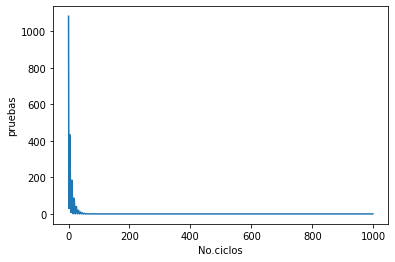

In [7]:
plt.xlabel("No.ciclos")
plt.ylabel("pruebas")
plt.plot(historial.history["loss"])

In [8]:
print("Prediccion")
resultado= modelo.predict([300])
print("El resultado es",str(resultado)+"dolares")

Prediccion
1/1 [==============================] - 0s 122ms/step
El resultado es [[15.166183]]dolares


# Red modificada Peso a dolar 

In [122]:
modelo=tf.keras.Sequential()

In [123]:
modelo.add(tf.keras.layers.Dense(4,input_dim=1,activation="relu"))
modelo.add(tf.keras.layers.Dense(5,activation="relu"))
modelo.add(tf.keras.layers.Dense(7,activation="tanh"))
modelo.add(tf.keras.layers.Dense(7,activation="tanh"))
modelo.add(tf.keras.layers.Dense(8,activation="relu"))
modelo.add(tf.keras.layers.Dense(10,activation="relu"))
modelo.add(tf.keras.layers.Dense(30,activation="relu"))
modelo.add(tf.keras.layers.Dense(1))

In [124]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="mean_squared_error",
    metrics=['binary_accuracy']
)

In [125]:
historial = modelo.fit(peso,dolar,epochs=3000,verbose=False);

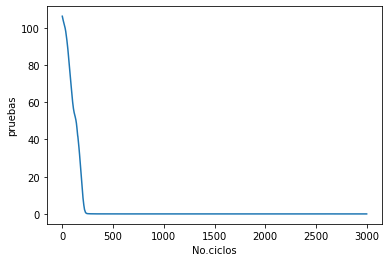

In [126]:
plt.xlabel("No.ciclos")
plt.ylabel("pruebas")
plt.plot(historial.history["loss"])

In [127]:
# plt.xlabel("Numero de pruebas")
# plt.ylabel("Magnitud de perdida")
# plt.plot(historial.history["binary_accuracy"])

In [128]:
print("Prediccion")
resultado= modelo.predict([300])
print("El resultado es",str(resultado)+"dolares")

Prediccion
1/1 [==============================] - 0s 115ms/step
El resultado es [[15.620346]]dolares


# Red Neuronal Peso a dolar y yen 

In [154]:
modelo=tf.keras.Sequential()

In [155]:
modelo.add(tf.keras.layers.Dense(16,input_dim=1,activation="relu"))
modelo.add(tf.keras.layers.Dense(5,activation="relu"))
modelo.add(tf.keras.layers.Dense(7,activation="tanh"))
modelo.add(tf.keras.layers.Dense(7,activation="tanh"))
modelo.add(tf.keras.layers.Dense(8,activation="relu"))
modelo.add(tf.keras.layers.Dense(10,activation="relu"))
modelo.add(tf.keras.layers.Dense(30,activation="relu"))
modelo.add(tf.keras.layers.Dense(2))

In [156]:
modelo.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 16)                32        
                                                                 
 dense_94 (Dense)            (None, 5)                 85        
                                                                 
 dense_95 (Dense)            (None, 7)                 42        
                                                                 
 dense_96 (Dense)            (None, 7)                 56        
                                                                 
 dense_97 (Dense)            (None, 8)                 64        
                                                                 
 dense_98 (Dense)            (None, 10)                90        
                                                                 
 dense_99 (Dense)            (None, 30)              

In [157]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="mean_squared_error",
    # metrics=['binary_accuracy']
)

In [158]:
historial = modelo.fit(peso,dolarYen,epochs=3000,verbose=False);

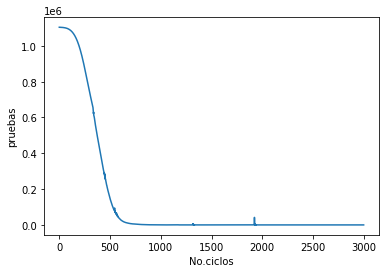

In [159]:
plt.xlabel("No.ciclos")
plt.ylabel("pruebas")
plt.plot(historial.history["loss"])

In [160]:
resultado= modelo.predict([300])


1/1 [==============================] - 0s 121ms/step


In [161]:
print(f"El resultado del dolar es {resultado[0][0]} y el resultado del yen es {resultado[0][1]}")

El resultado del dolar es 16.60572052001953 y el resultado del yen es 2397.5166015625


# Red neuronal peso a dolar,yen y libra esterlina

In [194]:
modelo=tf.keras.Sequential()

In [195]:
modelo.add(tf.keras.layers.Dense(16,input_dim=1,activation="relu"))
modelo.add(tf.keras.layers.Dense(5,activation="relu"))
modelo.add(tf.keras.layers.Dense(7,activation="tanh"))
modelo.add(tf.keras.layers.Dense(7,activation="tanh"))
modelo.add(tf.keras.layers.Dense(8,activation="relu"))
modelo.add(tf.keras.layers.Dense(10,activation="relu"))
modelo.add(tf.keras.layers.Dense(30,activation="relu"))
# modelo.add(tf.keras.layers.Dense(30,activation="relu"))
modelo.add(tf.keras.layers.Dense(3))

In [196]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="mean_squared_error",
    # metrics=['binary_accuracy']
)

In [197]:
historial = modelo.fit(peso,dolarYenLibra,epochs=4000,verbose=False);

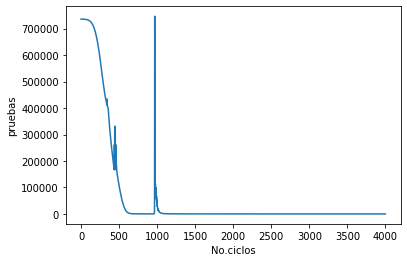

In [198]:
plt.xlabel("No.ciclos")
plt.ylabel("pruebas")
plt.plot(historial.history["loss"])

In [199]:
resultado= modelo.predict([300])

1/1 [==============================] - 0s 118ms/step


In [200]:
print(f"El resultado del dolar es {resultado[0][0]} , el resultado del yen es {resultado[0][1]} y el resultado de la libra es {resultado[0][2]}")

El resultado del dolar es 17.128202438354492 , el resultado del yen es 2493.3017578125 y el resultado de la libra es 14.69284725189209


### Fuentes 
https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/